<a href="https://colab.research.google.com/github/Vishal487/ML-Kaggle-Digit-recognizer/blob/master/Kaggle_digit_recognizer_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense 
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [ ]:
## drive/My Drive/Kaggle/Data/digit-recognizer/train.csv

In [ ]:
train_df = pd.read_csv('drive/My Drive/Kaggle/Data/digit-recognizer/train.csv')

In [ ]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df = pd.read_csv('drive/My Drive/Kaggle/Data/digit-recognizer/test.csv')
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(test_df.iloc[0])

784

In [ ]:
sum(train_df.isna().sum())

0

In [ ]:
sum(test_df.isna().sum())

0

In [ ]:
### split into X and y

X_train = train_df.drop('label', axis=1)
y_train = train_df['label']


In [ ]:
X_train.shape, y_train.shape

((42000, 784), (42000,))

In [ ]:
### check balancy of labels:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

Okay! great

In [ ]:
### Normalization : 0-255 => 0-1

X_train = X_train/255.0
test_df = test_df/255.0

In [ ]:
X_train.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
### Reshape the images   (28, 28)  => (28, 28, 1)

X_train = X_train.values.reshape(-1, 28, 28, 1)
test_df = test_df.values.reshape(-1, 28, 28, 1)

In [ ]:
### Label encodeing (One hot encoders)

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes=10)

In [ ]:
y_train.shape

(42000, 10)

We're ready with X_train, y_train

In [ ]:
### split into training and validation set

np.random.seed(42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

In [ ]:
### Build the model

model = Sequential()
model.add(Conv2D(32, (5,5),
                 padding='same',
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(32, (5,5),
                 padding='same',
                 activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3),
                 padding='same',
                 activation='relu'))
model.add(Conv2D(64, (3,3),
                 padding='same',
                 activation='relu'))
model.add(MaxPool2D((2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

In [ ]:
### Compile the model

optimizer = RMSprop()#lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
### train the model

batch_size = 86
epochs = 30

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
 - 6s - loss: 0.2126 - accuracy: 0.9316 - val_loss: 0.0927 - val_accuracy: 0.9750
Epoch 2/30
 - 4s - loss: 0.0544 - accuracy: 0.9830 - val_loss: 0.0445 - val_accuracy: 0.9876
Epoch 3/30
 - 4s - loss: 0.0397 - accuracy: 0.9877 - val_loss: 0.0462 - val_accuracy: 0.9883
Epoch 4/30
 - 4s - loss: 0.0321 - accuracy: 0.9903 - val_loss: 0.0453 - val_accuracy: 0.9883
Epoch 5/30
 - 4s - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.0421 - val_accuracy: 0.9895
Epoch 6/30
 - 4s - loss: 0.0243 - accuracy: 0.9926 - val_loss: 0.0296 - val_accuracy: 0.9912
Epoch 7/30
 - 4s - loss: 0.0208 - accuracy: 0.9936 - val_loss: 0.0302 - val_accuracy: 0.9917
Epoch 8/30
 - 4s - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.0392 - val_accuracy: 0.9912
Epoch 9/30
 - 4s - loss: 0.0164 - accuracy: 0.9949 - val_loss: 0.0330 - val_accuracy: 0.9924
Epoch 10/30
 - 4s - loss: 0.0155 - accuracy: 0.9951 - val_loss: 0.0307 - val_accuracy: 0.9921
Epoch 11/30
 - 4s - 

In [ ]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

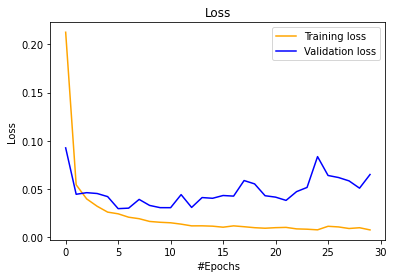

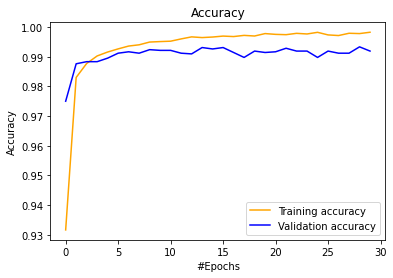

In [ ]:
### Let's plot the loss and accuracy

plt.plot(np.arange(epochs), history.history['loss'], color='orange', label='Training loss')
plt.plot(np.arange(epochs), history.history['val_loss'], color='blue', label='Validation loss')
plt.title('Loss')
plt.xlabel('#Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(np.arange(epochs), history.history['accuracy'], color='orange', label='Training accuracy')
plt.plot(np.arange(epochs), history.history['val_accuracy'], color='blue', label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('#Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
### Let's make predictions
predictions = model.predict(test_df)

In [ ]:
predictions[0]

array([1.1005045e-36, 2.7282962e-30, 1.0000000e+00, 6.7375493e-29,
       5.1069457e-27, 0.0000000e+00, 0.0000000e+00, 4.0688348e-26,
       3.0213875e-31, 1.1987910e-28], dtype=float32)

In [ ]:
pred_bool = (predictions>0.5)
pred_bool[0]

array([False, False,  True, False, False, False, False, False, False,
       False])

In [ ]:
pred_bool = pred_bool.astype(int)

In [ ]:
labels = ['zero', 'one', 'two', 'three', 'four',
          'five', 'six', 'seven', 'eight', 'nine']

In [ ]:
labels[np.argmax(pred_bool[0])]

'two'

prediction on test data set:



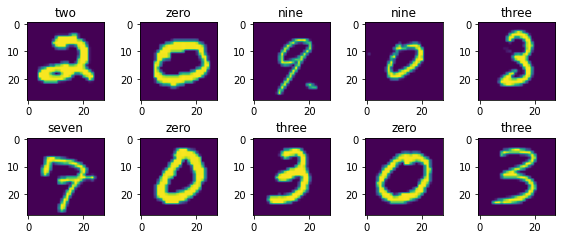

In [ ]:
### Now let's visualize the prediction

print('prediction on test data set:')
print('')
plt.figure(figsize=(8,8))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(test_df[i].reshape(28,28))
    plt.title(labels[np.argmax(pred_bool[i])])
plt.tight_layout(h_pad=0.5)
plt.show()

In [ ]:
### make submission file
label_col = []
for i in range(len(pred_bool)):
    label_col.append(np.argmax(pred_bool[i]))

label_col[:10]

[2, 0, 9, 9, 3, 7, 0, 3, 0, 3]

In [ ]:


submission = pd.DataFrame()
submission['ImageId'] = np.arange(1, len(test_df)+1)
submission['Label'] = label_col
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [ ]:
submission.to_csv('drive/My Drive/Kaggle/Submission/Digit_Rec_submission.csv', index=False)

In [ ]:
### open and check saved csv file
new_df = pd.read_csv('drive/My Drive/Kaggle/Submission/Digit_Rec_submission.csv')
new_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


THANK YOU!!!